entropy vs probability graph

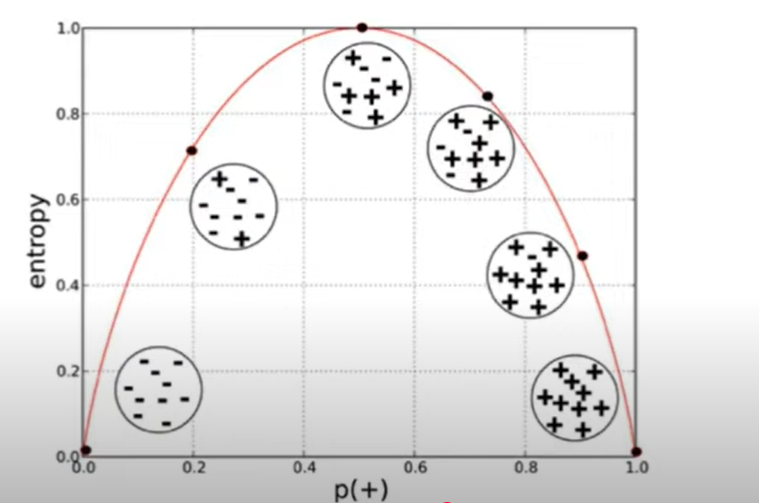

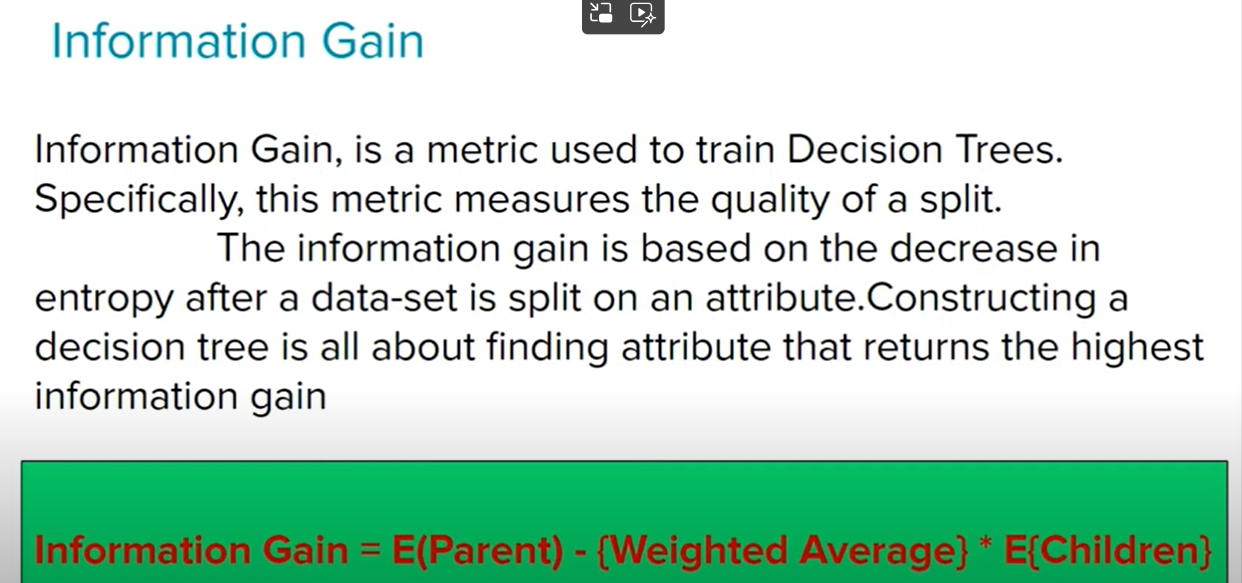

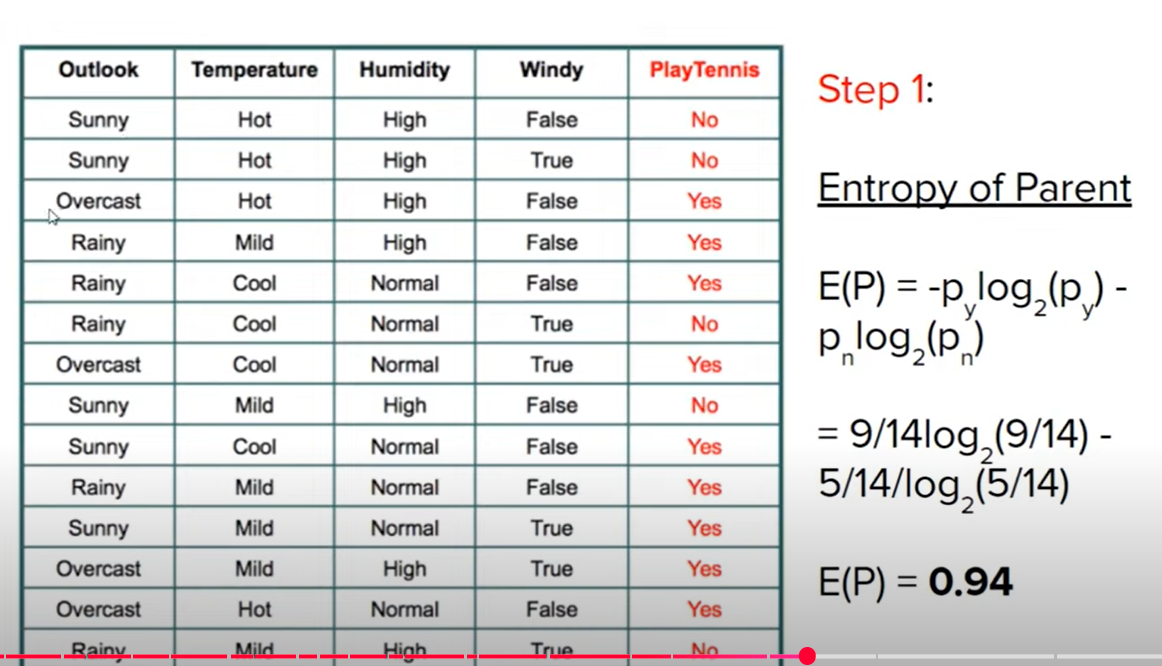

further we are splitting based on outlook
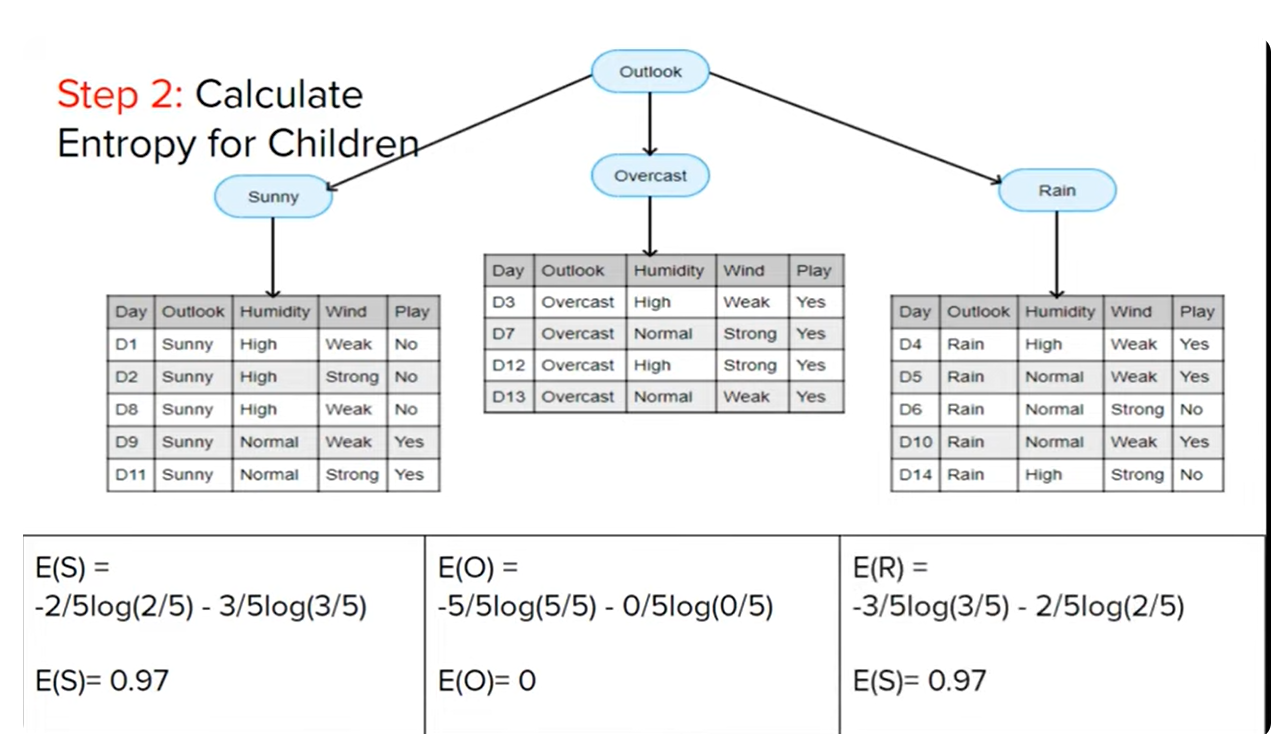


the weighted avg is calculated by 

summation of 
{
taking num of rows in curr data(after solit) divided by total num of rows in the original data multiplied with 
the entropy 
}

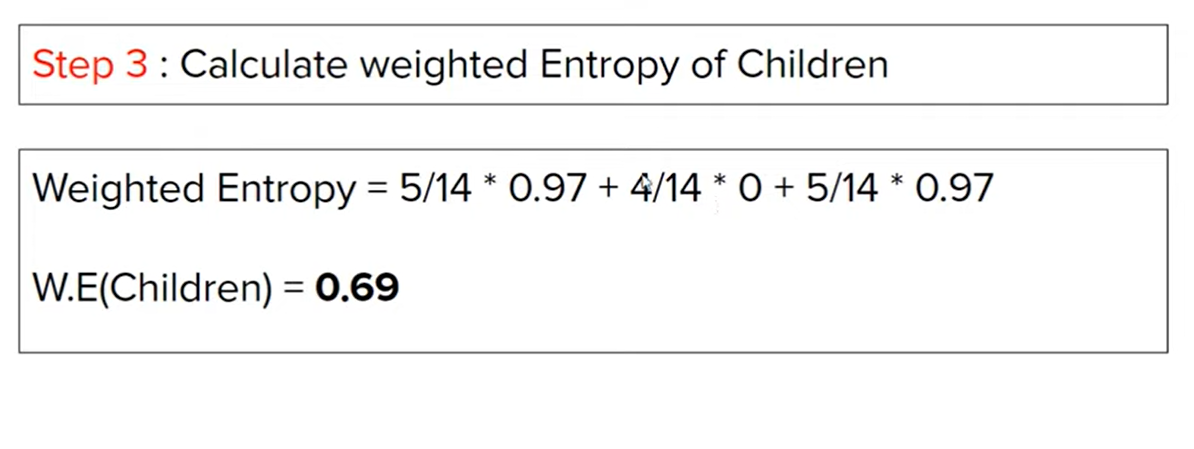
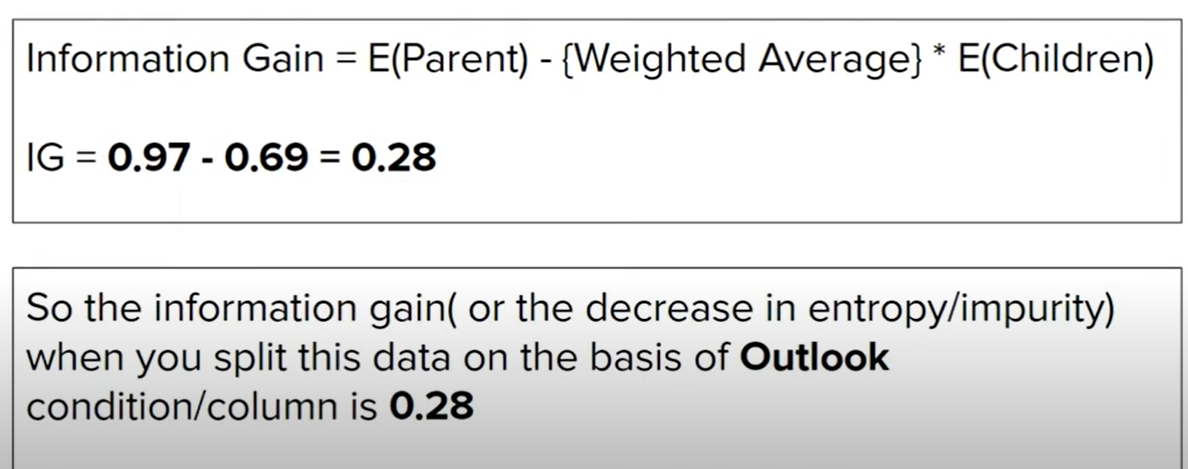
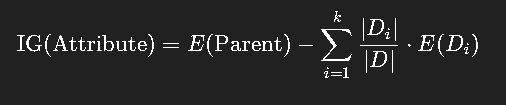
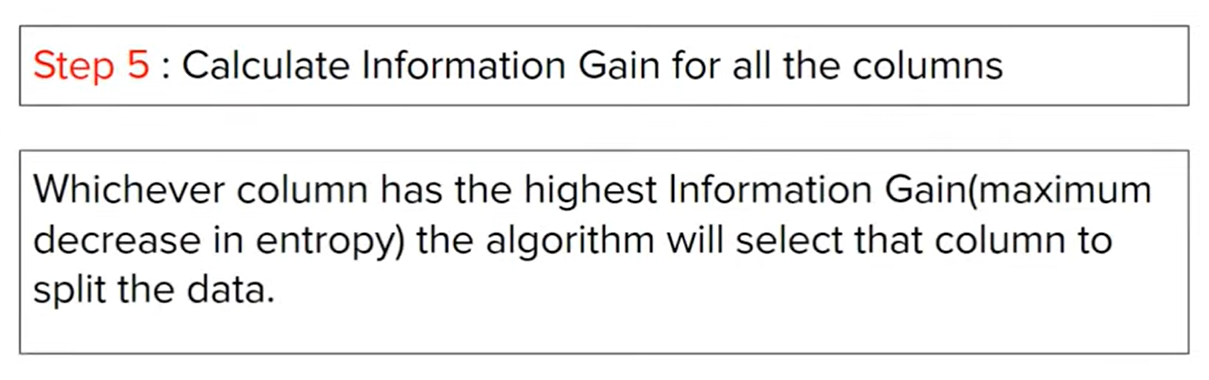
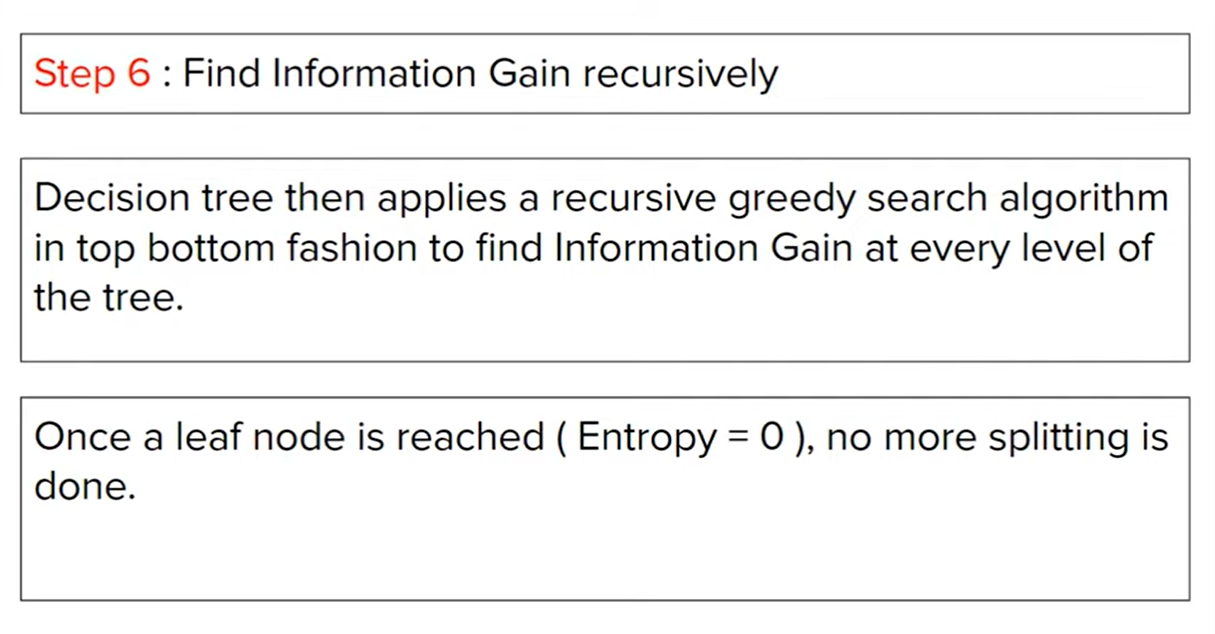

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

In [18]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [19]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)


print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [ ]:
X_train_small,y_train_small = X_train[:1000],y_train[:1000] 
X_test_small,y_test_small = X_test[:1000],y_test[:1000] 

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_small, y_train_small)

y_pred = decision_tree.predict(X_test_small)

original_accuracy = np.sum(y_pred == y_test[:1000]) / len(y_test[:1000])

print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test[:1000][:50]}")
print(f"Accuracy: {original_accuracy * 100:.2f}%")


Predicted labels: [7 2 1 0 4 1 4 3 1 4 0 6 2 0 1 5 9 7 5 4 9 5 7 5 4 0 7 4 0 1 3 1 4 4 7 0 7
 1 2 1 1 7 7 6 4 5 1 2 9 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 64.40%


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test[:1000], y_pred, output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'Accuracy': original_accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': decision_tree.__class__.__name__}

{'Accuracy': np.float64(0.644),
 'Precision': 0.6479737838949452,
 'Recall': 0.644,
 'F1-Score': 0.6436141617587852,
 'Model': 'DecisionTreeClassifier'}

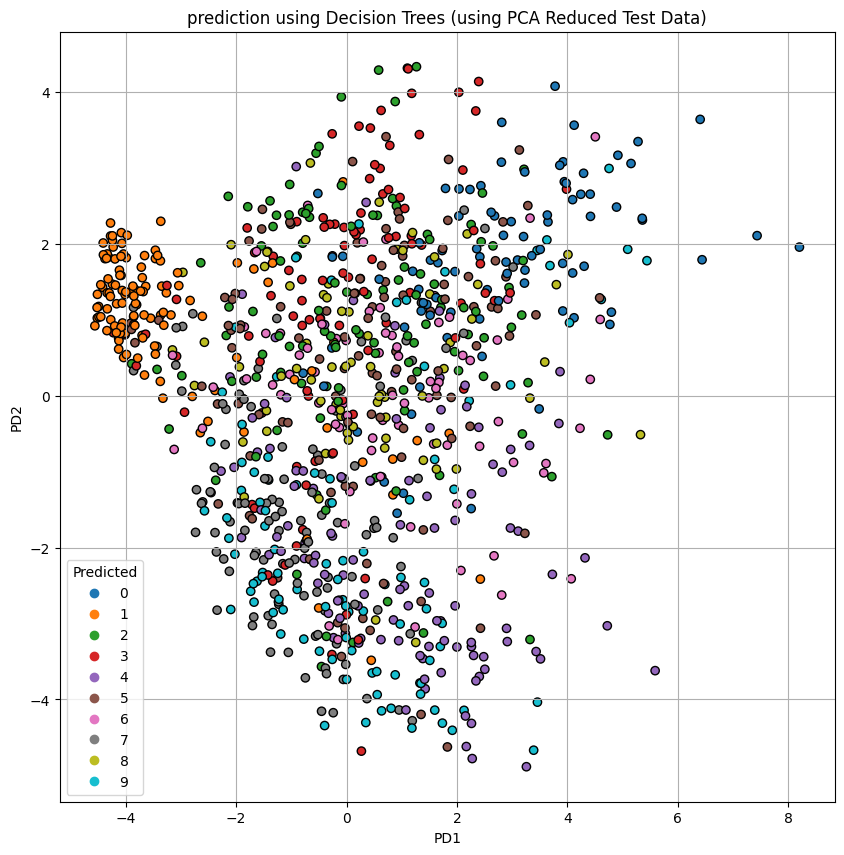

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(),title='Predicted')
plt.title("prediction using Decision Trees (using PCA Reduced Test Data)")
plt.xlabel("PD1")
plt.ylabel("PD2")
plt.grid(True)
plt.show()

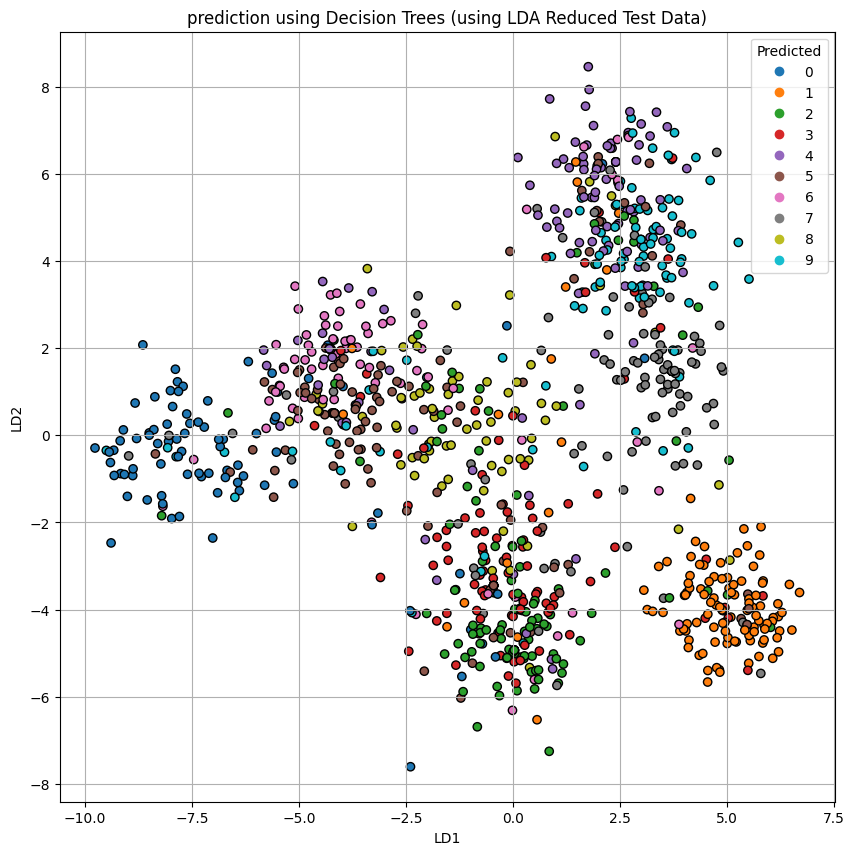

'\nWe observe that the accuracy is around 65.30%. \nA lot of the digits overlap,like (3,8,2,6), (6,5), and (4,9), which \ncauses the decision tree to struggle in these overlapping areas. \nThe decision tree seems to perform better on classes that are more \ndistinct like (1,0), but it still faces challenges with those \nmore ambiguous overlaps.overall its making poor predictions\n'

In [23]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
Here, we reduced the test data (X_test_small) into 2D using LDA, 
which tries to separate classes based on the true labels (y_test_small).
Then we visualized the predicted labels (y_pred) using colors.
If the same-colored points cluster together, it means the model is 
doing a decent job.
However, we notice overlaps (like between 3,8,2,6), which 
likely confused the model, leading to lower accuracy.
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using Decision Trees (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
We observe that the accuracy is around 65.30%. 
A lot of the digits overlap,like (3,8,2,6), (6,5), and (4,9), which 
causes the decision tree to struggle in these overlapping areas. 
The decision tree seems to perform better on classes that are more 
distinct like (1,0), but it still faces challenges with those 
more ambiguous overlaps.overall its making poor predictions
'''


c:\Users\anshb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


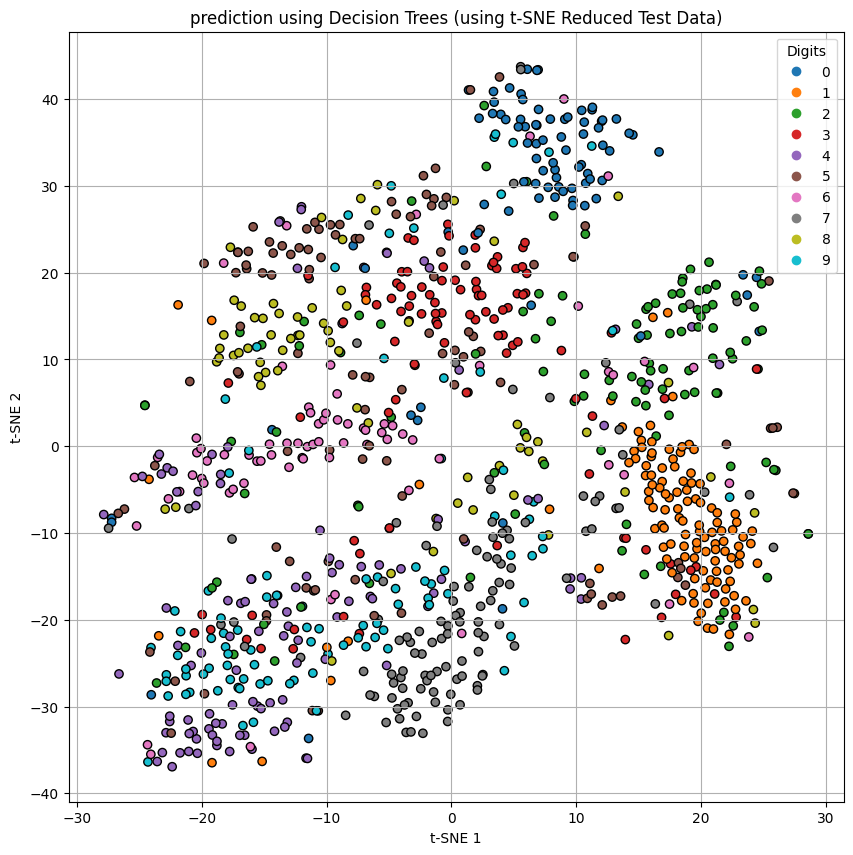

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50,n_iter=5000,n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_test_small)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using Decision Trees (using t-SNE Reduced Test Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

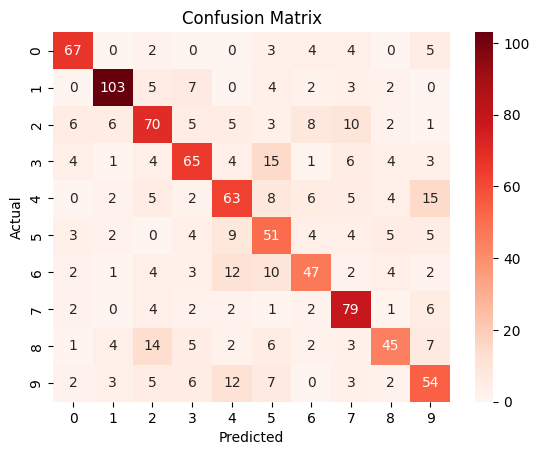

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_small, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

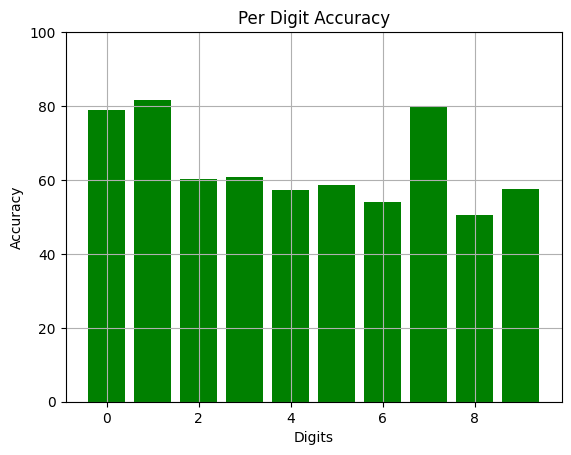

In [26]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test_small == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Per Digit Accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

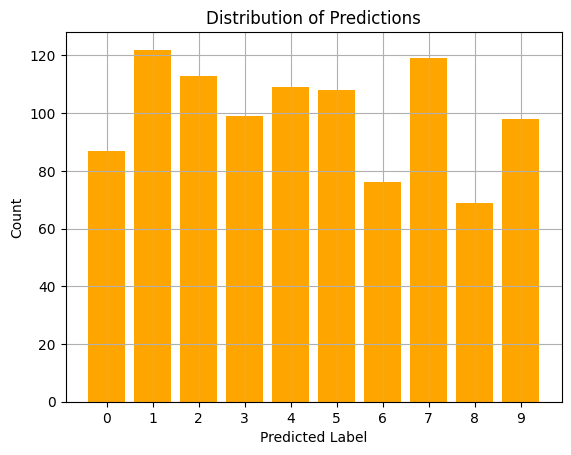

In [27]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()

Now we apply MMD(maximum mean d)

In [ ]:
def rbf_kernel(X, Y, gamma=1e-3):
    XX = np.sum(X**2, axis=1).reshape(-1, 1)
    YY = np.sum(Y**2, axis=1).reshape(1, -1)
    dist = XX + YY - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * dist)

def compute_mmd(X, Y, gamma=1e-3):
    K_xx = rbf_kernel(X, X, gamma)
    K_yy = rbf_kernel(Y, Y, gamma)
    K_xy = rbf_kernel(X, Y, gamma)
    m, n = X.shape[0], Y.shape[0]
    return np.sum(K_xx)/(m**2) + np.sum(K_yy)/(n**2) - 2*np.sum(K_xy)/(m*n)

samples_per_class = 3000
digit_data = {i: X_train[y_train == i][:samples_per_class] for i in range(10)}

mmd_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        mmd_matrix[i, j] = compute_mmd(digit_data[i], digit_data[j])

avg_mmd = np.mean(mmd_matrix, axis=1)
print(f"\nAverage MMD per class: {np.round(avg_mmd, 4)}")

import scipy.special
class_weights = scipy.special.softmax(avg_mmd)

sample_weights = np.array([class_weights[label] for label in y_train_small])

clf_weighted = DecisionTreeClassifier()
clf_weighted.fit(X_train_small, y_train_small, sample_weight=sample_weights)
y_pred_weighted = clf_weighted.predict(X_test_small)
weighted_accuracy = np.mean(y_pred_weighted == y_test_small)

print(f"\nMMD-Weighted Accuracy: {weighted_accuracy * 100:.2f}%")
print(f"Change in Accuracy: {(weighted_accuracy - original_accuracy) * 100:.2f}%")

Original Accuracy: 82.20%

Average MMD per class: [0.0589 0.0516 0.0365 0.0379 0.0364 0.0284 0.0412 0.0418 0.0309 0.0329]

MMD-Weighted Accuracy: 82.14%
Change in Accuracy: -0.06%


In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from keras.datasets import mnist
import numpy as np

def coral(source, target):
    from scipy.linalg import fractional_matrix_power
    cov_source = np.cov(source, rowvar=False) + np.eye(source.shape[1])
    cov_target = np.cov(target, rowvar=False) + np.eye(target.shape[1])
    cov_source_sqrt = fractional_matrix_power(cov_source, 0.5)
    cov_target_sqrt_inv = fractional_matrix_power(cov_target, -0.5)
    aligned_target = (target - target.mean(axis=0)) @ cov_target_sqrt_inv @ cov_source_sqrt + source.mean(axis=0)
    return aligned_target

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train), -1) / 255.0
X_test = X_test.reshape(len(X_test), -1) / 255.0

X_train_small, y_train_small = X_train[:30000], y_train[:30000]
X_test_small, y_test_small = X_test[:3000], y_test[:3000]

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train_small)
y_pred_orig = clf.predict(X_test_pca)
original_accuracy = np.mean(y_pred_orig == y_test_small)
print(f"Original Accuracy (PCA features): {original_accuracy * 100:.2f}%")

X_test_aligned = coral(X_train_pca, X_test_pca)

y_pred_coral = clf.predict(X_test_aligned)
coral_accuracy = np.mean(y_pred_coral == y_test_small)
print(f"CORAL-Aligned Accuracy: {coral_accuracy * 100:.2f}%")

print(f"Accuracy change: {(coral_accuracy - original_accuracy) * 100:.2f}%")


Original Accuracy (PCA features): 78.23%
CORAL-Aligned Accuracy: 77.13%
Accuracy change: -1.10%
